<font size="+3"><strong>Exploratory Data Analysis </strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import VimeoVideo

In [2]:
VimeoVideo("656355010", h="3cc6a34eba", width=600)

After importing, the next step in many data science projects is exploratory data analysis (EDA), where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.



# Import Data

In [3]:
VimeoVideo("656354357", h="8d99bdbfcd", width=600)

**Task 1.3.1:** Read the CSV file that you created in the last notebook (`"../small-data/mexico-real-estate-clean.csv"`) into a DataFrame named `df`. Be sure to check that all your columns are the correct data type before you go to the next task.

- [What's a DataFrame?](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)
- [What's a CSV file?](../%40textbook/03-pandas-getting-started.ipynb#CSV-Files)
- [Read a CSV file into a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [11]:
df = pd.read_csv('data/mexico-real-estate-clean.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   float64
 5   price_usd      1736 non-null   float64
dtypes: float64(4), object(2)
memory usage: 81.5+ KB


While there are only two `dtypes` in our DataFrame (`object` and `float64`), there are three categories of  data: location, categorical, and numeric. Each of these require a different kind of exploration in our analysis. 


# Location Data: `"lat"` and `"lon"`

They say that the most important thing in real estate is location, and we can see where where in Mexico our houses are located by using the `"lat"` and `"lon"` columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the [`scatter_mapbox`](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) from the plotly library.

In [12]:
VimeoVideo("656353826", h="236e9c5d43", width=600)

**Task 1.3.2:** Add `"lat"` and `"lon"` to the code below, and run the code. You'll see a map that's centered on Mexico City, and you can use the "Zoom Out" button in the upper-right corner of the map so that you can see the whole country. 

- [What's location data?](../%40textbook/05-pandas-summary-statistics.ipynb#Location-Data)
- [What's a scatter plot?](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

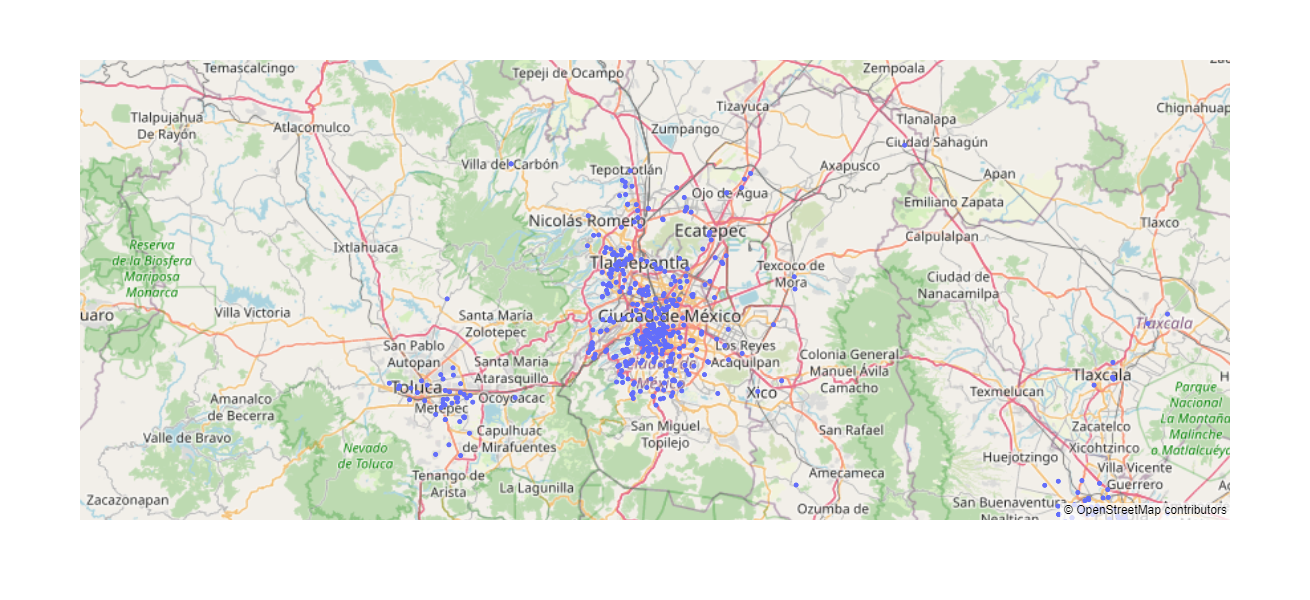

In [18]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Looking at this map, are the houses in our dataset distributed evenly throughout the country, or are there states or regions that are more prevalent? Can you guess where Mexico's biggest cities are based on this distribution?

# Categorical Data: `"state"`

Even though we can get a good idea of which states are most common in our dataset from looking at a map, we can also get the exact count by using the `"state"` column. 

In [19]:
VimeoVideo("656353463", h="ee8bffd02b", width=600)

**Task 1.3.3:** Use the [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method on the `"state"` column to determine the 10 most prevalent states in our dataset.

- [What's categorical data?](../%40textbook/05-pandas-summary-statistics.ipynb#Categorical-Data)
- [What's a Series?](../%40textbook/05-pandas-summary-statistics.ipynb#Series)
- [Aggregate data in a Series using `value_counts` in pandas.](../%40textbook/04-pandas-advanced.ipynb#Combine-multiple-categories-in-a-Series) 

In [31]:
#df["state"].nunique()
#df["state"].unique()
df["state"].value_counts().head(10)

Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: state, dtype: int64

# Numerical Data: `"area_m2"` and `"price_usd"`

We have a sense for where the houses in our dataset are located, but how much do they cost? How big are they? The best way to answer those questions is looking at descriptive statistics. 

In [32]:
VimeoVideo("656353149", h="2d5b273746", width=600)

**Task 1.3.4:** Use the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to print the mean, standard deviation, and quartiles for the `"area_m2"` and `"price_usd"` columns.

- [What's numerical data?](../%40textbook/05-pandas-summary-statistics.ipynb#Numerical-Data)
- [What's a mean?](../%40textbook/05-pandas-summary-statistics.ipynb#The-Mean)
- [What's a standard deviation?](../%40textbook/05-pandas-summary-statistics.ipynb#Standard-Deviation)
- [What are quartiles?](../%40textbook/05-pandas-summary-statistics.ipynb#Quartiles)
- [Print the summary statistics for a DataFrame using pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Working-with-Summary-Statistics)

In [34]:
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


Let's start by looking at `"area_m2"`. It's interesting that the mean is larger than the median (another name for the 50% quartile). Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there a difference of almost 15 m<sup>2</sup> between them? To answer this question, we need to see how house sizes are distributed in our dataset. Let's look at two ways to visualize the distribution: a histogram and a boxplot.

In [35]:
VimeoVideo("656352616", h="6075fbacb5", width=600)

**Task 1.3.5:** Create a histogram of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Sizes"`. 

- [What's a histogram?](../%40textbook/06-visualization-matplotlib.ipynb#Histograms)
- [Create a histogram using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Histograms) 

Text(0.5, 1.0, 'Distribution of Home Sizes')

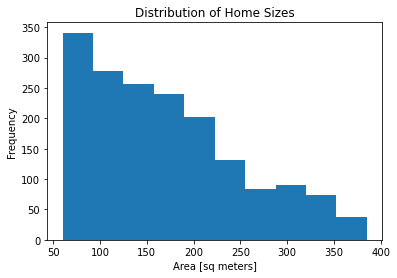

In [42]:
plt.hist(df['area_m2'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Frequency')
plt.title('Distribution of Home Sizes')

Looking at our histogram, we can see that `"area_m2"` skews right. In other words, there are more houses at the lower end of the distribution (50–200m<sup>2</sup>) than at the higher end (250–400m<sup>2</sup>). That explains the difference between the mean and the median.

In [43]:
VimeoVideo("656352166", h="5531b6e160", width=600)

**Task 1.3.6:** Create a horizontal boxplot of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Home Sizes"`. How is the distribution and its left skew represented differently here than in your histogram?

- [What's a boxplot?](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)
- [What's a skewed distribution?](../%40textbook/05-pandas-summary-statistics.ipynb#Skewed-Distributions)
- [Create a boxplot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)

In [50]:
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


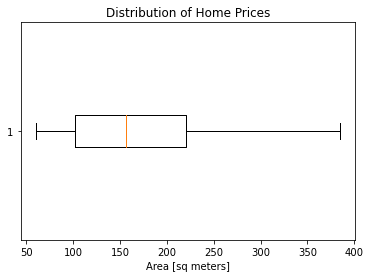

In [52]:
plt.boxplot(df["area_m2"],vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Prices");

Does `"price_usd"` have the same distribution as `"price_per_m2"`? Let's use the same two visualization tools to find out.

In [53]:
VimeoVideo("656351977", h="a0868bd01e", width=600)

**Task 1.3.7:** Create a histogram of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Prices"`. 

- [What's a histogram?](../%40textbook/06-visualization-matplotlib.ipynb#Histograms)
- [Create a histogram using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Histograms) 

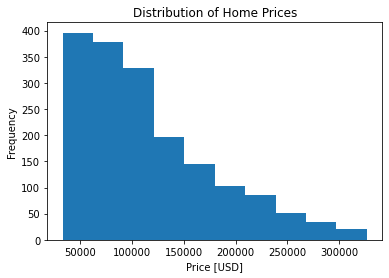

In [55]:
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

Looks like `"price_usd"` is even more skewed than `"area_m2"`. What does this bigger skew look like in a boxplot?

In [56]:
VimeoVideo("656351234", h="44ca8af7ac", width=600)

**Task 1.3.8:** Create a horizontal boxplot of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"` and the plot has the title `"Distribution of Home Prices"`.

- [What's a boxplot?](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)
- [What's an outlier?](../%40textbook/05-pandas-summary-statistics.ipynb#Outliers)
- [Create a boxplot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)

Text(0.5, 1.0, 'Distribution of Home Prices')

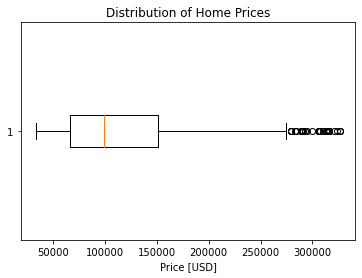

In [57]:
plt.boxplot(df["price_usd"],vert=False)
plt.xlabel("Price [USD]")
plt.title("Distribution of Home Prices")

Excellent job! Now that you have a sense of for the dataset, let's move to the next notebook and start answering some research questions about the relationship between house size, price, and location.

---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
